In [1]:
import pandas as pd
from PIL import Image
from IPython.display import Image as im2

# Standard Image

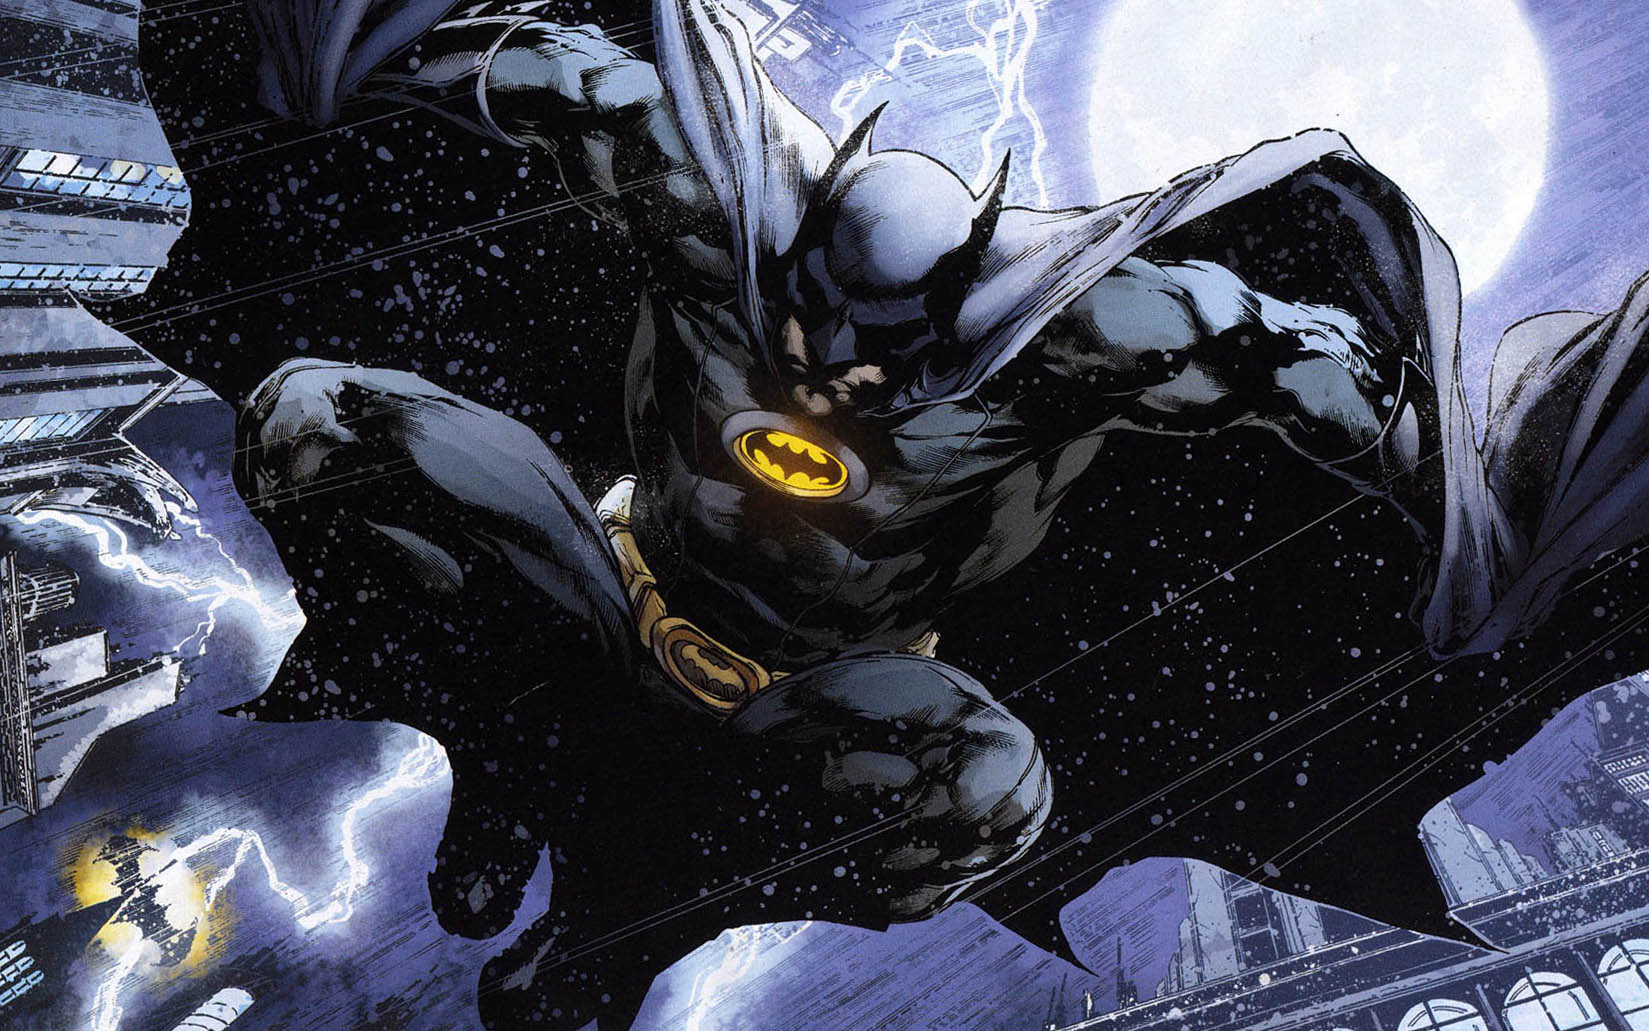

In [2]:
im2('batman.jpg', width=500, height=300)

# Analyze Image

In [3]:
im = Image.open('batman.jpg', 'r')
width, height = im.size
pixel_values = list(im.getdata())

In [4]:
pixelValues = pd.DataFrame(pixel_values)

In [5]:
pixelValues.shape

(1700119, 3)

In [6]:
# Here we analyze the RGB values from the image
# Note: All values are between 0 and 255
pixelValues.head()

,0,1,2
0,94,105,137
1,94,105,137
2,105,115,150
3,105,115,151
4,90,99,138


In [7]:
# Reduce feature size of pixels
pixelNormalized = pixelValues / 255
pixelNormalized.shape

(1700119, 3)

# Training Via Clustering

In [8]:
from sklearn.cluster import KMeans

In [9]:
# n_cluster is # of clusters, n_init is # of cycles, n_jobs is # of CPU cores
kmeans = KMeans(n_clusters=16, n_init=5, max_iter=100, verbose=10)

In [10]:
y = kmeans.fit_predict(pixelNormalized)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 5069.968605525103
start iteration
done sorting
end inner loop
Iteration 1, inertia 4781.175863929
start iteration
done sorting
end inner loop
Iteration 2, inertia 4710.299503272348
start iteration
done sorting
end inner loop
Iteration 3, inertia 4673.050591507642
start iteration
done sorting
end inner loop
Iteration 4, inertia 4645.663898573996
start iteration
done sorting
end inner loop
Iteration 5, inertia 4623.807938531218
start iteration
done sorting
end inner loop
Iteration 6, inertia 4608.105802325072
start iteration
done sorting
end inner loop
Iteration 7, inertia 4596.059903232264
start iteration
done sorting
end inner loop
Iteration 8, inertia 4586.957307099483
start iteration
done sorting
end inner loop
Iteration 9, inertia 4580.612291458913
start iteration
done sorting
end inner loop
Iteration 10, inertia 4575.2926225808715
start iteration
done sorting
end inner loop
Iteration 11, inerti

Iteration 13, inertia 4857.296967541234
start iteration
done sorting
end inner loop
Iteration 14, inertia 4853.896142405996
start iteration
done sorting
end inner loop
Iteration 15, inertia 4851.284896601312
start iteration
done sorting
end inner loop
Iteration 16, inertia 4849.253327240411
start iteration
done sorting
end inner loop
Iteration 17, inertia 4847.639320547888
start iteration
done sorting
end inner loop
Iteration 18, inertia 4846.424731305053
start iteration
done sorting
end inner loop
Iteration 19, inertia 4845.4516583299655
start iteration
done sorting
end inner loop
Iteration 20, inertia 4844.54564014789
start iteration
done sorting
end inner loop
Iteration 21, inertia 4843.7608612093945
start iteration
done sorting
end inner loop
Iteration 22, inertia 4842.97273092518
start iteration
done sorting
end inner loop
Iteration 23, inertia 4842.271833028074
start iteration
done sorting
end inner loop
Iteration 24, inertia 4841.520789438879
start iteration
done sorting
end inn

Iteration 11, inertia 4600.408800838308
start iteration
done sorting
end inner loop
Iteration 12, inertia 4596.958670489452
start iteration
done sorting
end inner loop
Iteration 13, inertia 4593.810990928164
start iteration
done sorting
end inner loop
Iteration 14, inertia 4590.479090910849
start iteration
done sorting
end inner loop
Iteration 15, inertia 4587.915756144964
start iteration
done sorting
end inner loop
Iteration 16, inertia 4585.892145584812
start iteration
done sorting
end inner loop
Iteration 17, inertia 4583.769252505769
start iteration
done sorting
end inner loop
Iteration 18, inertia 4582.169367502261
start iteration
done sorting
end inner loop
Iteration 19, inertia 4580.971262528971
start iteration
done sorting
end inner loop
Iteration 20, inertia 4579.870200809139
start iteration
done sorting
end inner loop
Iteration 21, inertia 4578.501274611728
start iteration
done sorting
end inner loop
Iteration 22, inertia 4577.212745868448
start iteration
done sorting
end inn

In [11]:
# Provides the cluster affiliated with each individual pixel
clusterDF = pd.DataFrame(y)
clusterDF.head()

,0
0,11
1,11
2,11
3,11
4,2


In [12]:
# Provides the pixel location for each of clusters
centroids = kmeans.cluster_centers_
centroidsDF = pd.DataFrame(centroids)

# Converting back to pixel range
centroidsDF = round(centroidsDF * 255)
centroidsDF = centroidsDF.astype(int)
centroidsDF

,0,1,2
0,29,28,35
1,159,170,208
2,87,93,125
3,239,242,250
4,53,57,80
5,122,131,165
6,43,44,55
7,15,13,17
8,207,217,238
9,222,196,84


# Plotting

In [13]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
figure = plt.Figure(figsize=(5,5))

In [15]:
colors = map(lambda x: colmap[x+1], clusterDF)

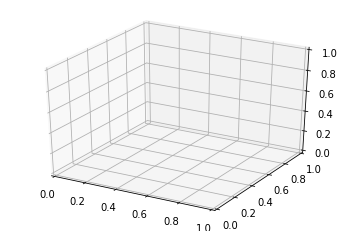

In [16]:
ax = plt.axes(projection='3d')
# Takes forever
#ax.scatter3D(pixelValues[0], pixelValues[1], pixelValues[2], c=pixelValues[2], cmap='Greens')

# Image Recreation

In [17]:
def saveImageFromDF(pixelValues, height, width, fileName):
    # Change df of pixels to proper image size
    imageRecreation = pixelValues.values
    imageRecreation.shape = (height, width, 3)

    result = Image.fromarray((imageRecreation).astype(np.uint8))
    result.save(fileName)

    return result

In [18]:
print(pixelValues.head())
print(clusterDF.head())

     0    1    2
0   94  105  137
1   94  105  137
2  105  115  150
3  105  115  151
4   90   99  138
    0
0  11
1  11
2  11
3  11
4   2


In [88]:
# Combine pixel values and their cluster
pixelClusters = pd.DataFrame(columns=[0, 1, 2])

In [89]:
# Adds the new, clustered RGB values into the dataframe
for i in range(len(clusterDF) - 1):
    pixelClusters = pixelClusters.append(centroidsDF.loc[clusterDF.loc[i]])
    
    if i % 10000 == 0:
        print('{0} values replaced'.format(i))

0 values replaced
10000 values replaced
20000 values replaced
30000 values replaced
40000 values replaced
50000 values replaced
60000 values replaced
70000 values replaced
80000 values replaced
90000 values replaced
100000 values replaced
110000 values replaced
120000 values replaced
130000 values replaced
140000 values replaced
150000 values replaced
160000 values replaced
170000 values replaced
180000 values replaced
190000 values replaced
200000 values replaced
210000 values replaced
220000 values replaced
230000 values replaced
240000 values replaced
250000 values replaced
260000 values replaced
270000 values replaced
280000 values replaced
290000 values replaced
300000 values replaced
310000 values replaced
320000 values replaced
330000 values replaced
340000 values replaced
350000 values replaced
360000 values replaced
370000 values replaced
380000 values replaced
390000 values replaced
400000 values replaced
410000 values replaced
420000 values replaced
430000 values replaced
44

KeyboardInterrupt: 

In [83]:
pixelClusters

,0,1,2


In [45]:
result = saveImageFromDF(pixelValues, height, width, 'test.jpg')